In [2]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import seaborn as sns # Also for Data visuvalization

from sklearn.metrics.pairwise import cosine_similarity  # Compute cosine similarity between samples in X and Y.
from scipy import sparse  #  sparse matrix package for numeric data, helps you save memory if the table/matrix is very big with lots of zero values
from scipy.sparse.linalg import svds # svd algorithm, Singular Value Decomposition

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
Rating = pd.read_csv('Ratings.csv')
Movie_D = pd.read_csv('Movie details.csv', encoding='latin-1') ##Movie details

In [4]:
Rating.shape

(100000, 4)

In [5]:
Rating.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
Rating.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

In [7]:
Rating.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
Movie_D.shape

(1682, 24)

In [9]:
Movie_D.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [10]:
Movie_D.columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date ',
       'IMDb_URL', 'unknown', 'Action ', 'Adventure', 'Animation',
       'Childrens', 'Comedy ', 'Crime ', ' Documentary ', 'Drama',
       ' Fantasy', 'Film-Noir ', 'Horror ', 'Musical', 'Mystery',
       ' Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [11]:
Movie_D.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [12]:
Movie_Rating = pd.merge(Rating, Movie_D, on='movie_id')
Movie_Rating.describe()

,user_id,movie_id,rating,timestamp,video_release_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,1.000000e+05,0.0,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,NaN,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,0.007580,0.398950,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,330.798356,1.125674,5.343856e+06,NaN,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,0.086733,0.489685,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,1.000000,1.000000,8.747247e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,NaN,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,NaN,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [13]:
Movie_Rating.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-97,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
n_users = Movie_Rating.user_id.unique().shape[0]
n_items = Movie_Rating.movie_id.unique().shape[0]
print(n_users, n_items)

943 1682


In [16]:
# Calculate mean rating of all movies 
Movie_Stats = pd.DataFrame(Movie_Rating.groupby('movie_title')['rating'].mean())
Movie_Stats.sort_values(by = ['rating'], ascending=False).head() # Descending order of average ratings

,rating
movie_title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [17]:
Movie_Stats.sort_values(by = ['rating']).head() # Ascending order of average ratings

,rating
movie_title,
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0
Butterfly Kiss (1995),1.0
Daens (1992),1.0
JLG/JLG - autoportrait de décembre (1994),1.0
Touki Bouki (Journey of the Hyena) (1973),1.0


In [18]:
# Calculate count rating of all movies
Movie_Stats['Count_of_ratings'] = pd.DataFrame(Movie_Rating.groupby('movie_title')['rating'].count())
Movie_Stats.sort_values(by =['Count_of_ratings'], ascending=False).head() #Descending order of counts

,rating,Count_of_ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


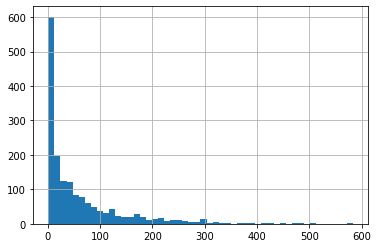

In [19]:
Movie_Stats['Count_of_ratings'].hist(bins=50)

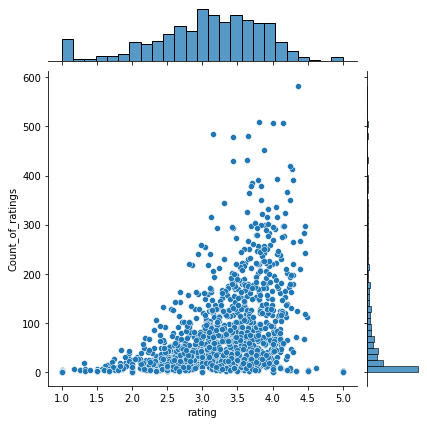

In [20]:
sns.jointplot(x='rating', y='Count_of_ratings', data=Movie_Stats) #scatter plot seaborn

In [21]:
User_movie_Rating = Movie_Rating.pivot_table(index='user_id', columns='movie_title', values='rating')
User_movie_Rating.head()

movie_title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                       
1                                  NaN           NaN                    2.0   
2                                  NaN           NaN                    NaN   
3                                  NaN           NaN                    NaN   
4                                  NaN           NaN                    NaN   
5                                  NaN           NaN                    2.0   

movie_title  12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                     
1                            5.0         NaN                          NaN   
2                            NaN         NaN                          NaN   
3                            NaN         2.0                          NaN   
4                            NaN         NaN                          NaN   
5                            NaN         NaN                          NaN   

movie_title  20,000 Leagues Under the Sea (1954)  \
user_id                                            
1                                            3.0   
2                                            NaN   
3                                            NaN   
4                                            NaN   
5                                            NaN   

movie_title  2001: A Space Odyssey (1968)  \
user_id                                     
1                                     4.0   
2                                     NaN   
3                                     NaN   
4                                     NaN   
5                                     4.0   

movie_title  3 Ninjas: High Noon At Mega Mountain (1998)  \
user_id                                                    
1                                                    NaN   
2                                                    1.0   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   

movie_title  39 Steps, The (1935)  8 1/2 (1963)  \
user_id                                           
1                             NaN           NaN   
2                             NaN           NaN   
3                             NaN           NaN   
4                             NaN           NaN   
5                             NaN           NaN   

movie_title  8 Heads in a Duffel Bag (1997)  8 Seconds (1994)  \
user_id                                                         
1                                       NaN               NaN   
2                                       NaN               NaN   
3                                       NaN               NaN   
4                                       NaN               NaN   
5                                       NaN               NaN   

movie_title  A Chef in Love (1996)  Above the Rim (1994)  \
user_id                                                    
1                              NaN                   NaN   
2                              NaN                   NaN   
3                              NaN                   NaN   
4                              NaN                   NaN   
5                              NaN                   NaN   

movie_title  Absolute Power (1997)  Abyss, The (1989)  \
user_id                                                 
1                              NaN                3.0   
2                              3.0                NaN   
3                              NaN                NaN   
4                              NaN                NaN   
5                              NaN                NaN   

movie_title  Ace Ventura: Pet Detective (1994)  \
user_id                                          
1                                          3.0   
2                  

In [22]:
User_movie_Rating.shape
# There are 1664 unique movie_titles compared to 1682 unique movie_ids whic means some movie_ids have the same movie_title.

(943, 1664)

In [23]:
User_movie_Rating['Air Force One (1997)']

user_id
1      NaN
2      4.0
3      2.0
4      5.0
5      NaN
6      NaN
7      4.0
8      NaN
9      NaN
10     NaN
11     3.0
12     4.0
13     1.0
14     NaN
15     4.0
16     5.0
17     NaN
18     NaN
19     NaN
20     NaN
21     3.0
22     NaN
23     NaN
24     4.0
25     NaN
26     4.0
27     NaN
28     NaN
29     3.0
30     NaN
31     NaN
32     NaN
33     4.0
34     NaN
35     5.0
36     NaN
37     NaN
38     NaN
39     3.0
40     3.0
41     NaN
42     NaN
43     5.0
44     NaN
45     NaN
46     3.0
47     NaN
48     NaN
49     1.0
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     4.0
57     NaN
58     4.0
59     NaN
60     NaN
61     5.0
62     NaN
63     4.0
64     3.0
65     NaN
66     5.0
67     NaN
68     NaN
69     3.0
70     4.0
71     NaN
72     NaN
73     NaN
74     3.0
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     3.0
84     4.0
85     3.0
86     3.0
87     3.0
88     3.0
89     NaN
90     3.0
91

In [24]:
Similarity = User_movie_Rating.corrwith(User_movie_Rating['Air Force One (1997)']) # Correlation of this movie with all other movies
Similarity.head()

movie_title
'Til There Was You (1997)    0.867722
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.221943
12 Angry Men (1957)          0.228031
187 (1997)                   0.294232
dtype: float64

In [25]:
corr_similar = pd.DataFrame(Similarity, columns=['Correlation'])
corr_similar.sort_values(['Correlation'], ascending= False).head(10)
# Content based recommendation

,Correlation
movie_title,
Love and Death on Long Island (1997),1.0
Losing Chase (1996),1.0
Phat Beach (1996),1.0
My Crazy Life (Mi vida loca) (1993),1.0
Tetsuo II: Body Hammer (1992),1.0
Jack and Sarah (1995),1.0
Vermin (1998),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
For Ever Mozart (1996),1.0


In [26]:
corr_similar_num_of_rating = corr_similar.join(Movie_Stats['Count_of_ratings'])
corr_similar_num_of_rating.sort_values(['Correlation'], ascending= False).head(10)

,Correlation,Count_of_ratings
movie_title,,
Love and Death on Long Island (1997),1.0,2
Losing Chase (1996),1.0,8
Phat Beach (1996),1.0,5
My Crazy Life (Mi vida loca) (1993),1.0,11
Tetsuo II: Body Hammer (1992),1.0,6
Jack and Sarah (1995),1.0,7
Vermin (1998),1.0,2
Faster Pussycat! Kill! Kill! (1965),1.0,7
For Ever Mozart (1996),1.0,3


In [27]:
corr_similar_num_of_rating[corr_similar_num_of_rating ['Count_of_ratings']>50].sort_values('Correlation', ascending=False).head()
# If we do content-based recommendation, then we will recommend Black Sheep to all the users irrespective if they have watched/rated
# Air Force One or Black Sheep. This is a very immature kind of recommendation.

,Correlation,Count_of_ratings
movie_title,,
Air Force One (1997),1.000000,431
Black Sheep (1996),0.766259,55
Copycat (1995),0.711744,86
Tales from the Crypt Presents: Bordello of Blood (1996),0.639372,55
Addicted to Love (1997),0.576379,54


In [28]:
Movie_cosine = Movie_Rating[['user_id','movie_id','rating']]
Movie_cosine.head()

,user_id,movie_id,rating
0,196,242,3
1,63,242,3
2,226,242,5
3,154,242,3
4,306,242,5


In [29]:
# corrwith function can work with NaN values to find correlations. But the cosine similarity
# function can NOT work with NaNs. So the solution is to convert NaNs into zeros(default zero rating).
# But the problem is that a table with 943 users/rows and 1664 movies/columns without any missing value
# will be too big a table to store in the memory. That is why we store that big table as a sparse matrix/table.
# Sparse matrix can store big tables with lots of zero values by claiming only a small portion of computer memory.

data = Movie_cosine.rating # rating column
col = Movie_cosine.movie_id # movie_id column
row = Movie_cosine.user_id # user_id

R = sparse.coo_matrix((data, (col, row))).tocsr() # R is the table with 943 users/columns and 1683 movies/rows with missing values = 0.0
print('{0}x{1} user by movie matrix'.format(*R.shape))

1683x944 user by movie matrix


In [30]:
find_similarities = cosine_similarity(R.T) # We are transposing the matrix 
# .T does the transpose which means that if R is a table with 943 users/columns and 1683 movies/rows then R.T
# becomes a table of 943 users/rows and 1683 movies/columns
print (find_similarities.shape)
# shape of find_similarities is 944 x 944, we have found cosine similarity between every 2 users

(944, 944)


In [31]:
find_similarities[4].argsort() # 4th user

array([  0, 607, 590, 585, 565, 558,  93, 492, 469, 289, 266, 243, 225,
       212, 208, 196, 172, 131, 670, 728,  67, 762, 918, 914, 792, 855,
       888, 331, 845, 449, 822, 106, 167, 385, 707, 553, 765, 122, 932,
       426, 138, 383, 237, 349, 731,  98, 906, 366, 658, 911, 939, 604,
       795, 522, 316, 218, 776, 312,   5, 891, 340, 912, 326, 338, 471,
       767, 458, 477, 161, 233, 434,  96, 524,  18, 778, 568, 662, 935,
       398, 617, 518, 132, 269, 321, 849, 829, 769, 684, 567, 878, 874,
       189, 562, 239, 696, 720, 226,  81, 581, 858, 794, 361, 279, 917,
       114, 252, 437, 766, 571, 536, 187, 370, 883, 180, 156, 389, 718,
       649, 929, 337, 481, 421, 264, 901, 452, 420, 638, 357, 123, 639,
       823, 152, 612, 664, 814, 386, 712, 412, 236, 934, 306, 559,  52,
       295, 821, 373, 928,  72,  17, 884, 382, 754, 232, 182, 916, 359,
       622, 194, 402, 786, 667,  55, 267,  60, 174, 157, 690,  87, 798,
       636, 715, 561, 859, 648, 354,  73,  77, 943, 406, 591, 57

In [ ]:
# [3,4,2,5]

# [2,3,4,5] -- sort()
# [2, 0, 1, 3] -- argsort(), look at the sorted values' index in the original array

In [37]:
find_similarities[4].sort() # 4th user
find_similarities[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01162857, 0.01252625, 0.01631528,
       0.01690577, 0.0180634 , 0.01814084, 0.0188039 , 0.02060865,
       0.02175031, 0.02272493, 0.02305203, 0.02327448, 0.02343988,
       0.02389444, 0.024542  , 0.02535884, 0.02561379, 0.02755359,
       0.02792133, 0.02792275, 0.02840659, 0.02867549, 0.02970533,
       0.03013778, 0.03024196, 0.03034896, 0.03059212, 0.03063165,
       0.03087837, 0.03090804, 0.03105672, 0.03180425, 0.03194464,
       0.03219656, 0.03225555, 0.03240683, 0.03240964, 0.033562  ,
       0.03395884, 0.03453749, 0.0347692 , 0.03479083, 0.03485012,
       0.03509474, 0.03526974, 0.03539784, 0.03558204, 0.03580

In [32]:
find_similarities[4].argsort()[-5:]
# 750th user is the user closest to user number 4 based on cosine similarity
# Collaborative filtering because we have user vs user matching

array([509, 570, 451, 750,   4])

In [33]:
Movie_D.iloc[4]

movie_id                                                               5
movie_title                                               Copycat (1995)
release_date                                                    1-Jan-95
video_release_date                                                   NaN
IMDb_URL               http://us.imdb.com/M/title-exact?Copycat%20(1995)
unknown                                                                0
Action                                                                 0
Adventure                                                              0
Animation                                                              0
Childrens                                                              0
Comedy                                                                 0
Crime                                                                  1
 Documentary                                                           0
Drama                                              

In [34]:
Movie_D.iloc[find_similarities[4].argsort()[-5:]]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
509,510,"Magnificent Seven, The (1954)",1-Jan-54,NaN,http://us.imdb.com/M/title-exact?Shichinin%20n...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
570,571,Another Stakeout (1993),1-Jan-93,NaN,http://us.imdb.com/M/title-exact?Another%20Sta...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
451,452,Jaws 2 (1978),1-Jan-78,NaN,http://us.imdb.com/M/title-exact?Jaws%202%20(1...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
750,751,Tomorrow Never Dies (1997),1-Jan-97,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [38]:
df_matrix = User_movie_Rating.fillna(0) # User on rows and Movie on columns -- Table missing values = 0
# df_matrix table of 943 rows and 1664 columns with all missing values set to 0
# The preffered way of storing such a big table with so many zeros is to store it as a sparse matrix in the memory.

In [39]:
df_matrix.shape

(943, 1664)

In [40]:
df_matrix.iloc[2]

movie_title
'Til There Was You (1997)                                                            0.0
1-900 (1994)                                                                         0.0
101 Dalmatians (1996)                                                                0.0
12 Angry Men (1957)                                                                  0.0
187 (1997)                                                                           2.0
2 Days in the Valley (1996)                                                          0.0
20,000 Leagues Under the Sea (1954)                                                  0.0
2001: A Space Odyssey (1968)                                                         0.0
3 Ninjas: High Noon At Mega Mountain (1998)                                          0.0
39 Steps, The (1935)                                                                 0.0
8 1/2 (1963)                                                                         0.0
8 Heads i

In [44]:
# We want to recommend movies to user number 2 based on the match between his liking and other similar users preferences
U, SIGMA, VT = svds(df_matrix, k=6) #k=20 # Singular Value Decomposition -- breaks the input matrix/table into 3 matricx/tables
U.shape, SIGMA.shape, VT.shape
# We need 2 matrix outputs but the available mathemtical function that we have return 3 matrices, so what we do we club the last 2 together
# So we end up with the required 2 matrices
# 943 x 1664 matrix ==> 1st matrix (943 x 6) by default 6 movie genres , 2nd matrix [6 x (6, 1664) = 6 x 1664]

# Mathematically,
# k can be minimum 1 single genre
# k can be maximum 943 genres, if you multiply 1st matrix (943 x 6) and 2nd Matrix (6 x 1664) you will exactly get back df_matrix
# but if k's value is different from 943 then you will get approximated df_matrix

((943, 6), (6,), (6, 1664))

In [45]:
SIGMA

array([145.69280761, 158.09802892, 158.82046687, 217.66028674,
       244.5502181 , 640.39419917])

In [46]:
# svds returns the middle matrix as just 6 values which cannot be multiplied with (6 x 1664) matrix to club
# both of them together 

# to club the SIGMA with VT we have to convert SIGMA through a np.diag call, usinf np.diag call we convert those 6 values into 
#  a matrix of size 6 x 6
SIGMA = np.diag(SIGMA)
U.shape, SIGMA.shape, VT.shape

((943, 6), (6, 6), (6, 1664))

In [47]:
SIGMA

array([[145.69280761,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        , 158.09802892,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 158.82046687,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 217.66028674,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        244.5502181 ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 640.39419917]])

In [48]:
reconstructed_df = np.dot(np.dot(U, SIGMA), VT)
predictions_df = pd.DataFrame(reconstructed_df, columns = df_matrix.columns)
predictions_df.iloc[2]

movie_title
'Til There Was You (1997)                                                            0.040301
1-900 (1994)                                                                         0.000785
101 Dalmatians (1996)                                                               -0.129072
12 Angry Men (1957)                                                                  0.014870
187 (1997)                                                                           0.384444
2 Days in the Valley (1996)                                                          0.109213
20,000 Leagues Under the Sea (1954)                                                  0.009929
2001: A Space Odyssey (1968)                                                         0.001573
3 Ninjas: High Noon At Mega Mountain (1998)                                          0.015915
39 Steps, The (1935)                                                                 0.002723
8 1/2 (1963)                                    

In [49]:
predictions_df.iloc[2][df_matrix.iloc[2]==0.0].sort_values(ascending=False).head()
# Since user 2 has not watched Titanic, what we have done is that
# we have predicted the rating for user 2 on titanic(even without user 2 watching Titanic) using SVD algorithm
# So we can recommend Titatnic to User number 2.

movie_title
Titanic (1997)                 2.886744
English Patient, The (1996)    2.252039
Full Monty, The (1997)         2.074491
Apt Pupil (1998)               1.764597
Saint, The (1997)              1.552024
Name: 2, dtype: float64